In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import statistics
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

import os
print(os.listdir("../input"))

from scipy.stats import kde

['stock-price', 'airline-delays', 'houses-tax-data', 'percentage-of-delays-by-cause-at-dfw', 'murder-rates-by-states', 'letterofcredit-loans']


*Source*: Book - Practical Statistics for Data Scientists. Code samples were translated from R to Python by me.

# Table of Contents
1. [Estimation of Location](#Estimation-of-Location)
>* [Mean](#Mean)
>* [Trimmed Mean](#Trimmed-Mean)
>* [Median](#Median)
>* [Weighted Mean](#Weighted-Mean)
>* [Weighted Median](#Weighted-Median)
2. [Estimation of Variability](#Estimation-of-Variability)
>* [Deviation](#Deviation)
>* [Variance](#Variance)
>* [Standard Deviation](#Standard-Deviation)
>* [Mean Absolute Deviation](#Mean-Absolute-Deviation)
>* [Median Absolute Deviation](#Median-Absolute-Deviation)
>* [Range](#Range)
>* [Quartiles and InterQuartile Range](#Quartiles-and-InterQuartile Range)
3. [Exploring the Data Distributions](#Exploring-the-Data-Distributions)
>* [Percentiles and Boxplots(whisker plots)](#Percentiles-and-boxplot)
>* [Frequency tables and hisograms](#Frequency-tables-and-hisograms)
>>* [Frequency Table](#Frequency-Table)
>>* [Hisogram](#Hisograms)
4. [Exploring Categorical Data](#Exploring-Categorical-Data)
>* [Mode](#Mode)
5. [Correlation](#Correlation)
>* [Correlation Matrix](#Correlation-Matrix)
>* [Scatterplot](#Frequency-tables-and-hisograms)
6. [Exploring Two or More variables](#Exploring-Two-or-More-variables)
>* [Contingency Table](#Contingency-Table)
>* [Hexagonal Binning](#Hexagonal-Binning)
>* [Contour Plot](#Contour-Plot)
>* [Categorical and Numeric Data](#Categorical-and-Numeric-Data)
>>* [Boxplots (multiple)](#Boxplots)
>>* [Violin Plots](#Violin-Plots)
>* [Visualising Multiple Variables](#Visualising-Multiple-Variables)
7. [Summary](#Summary)

In [2]:
df = pd.read_csv("../input/murder-rates-by-states/state.csv")
df.head(10)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE
8,Florida,18801310,5.8,FL
9,Georgia,9687653,5.7,GA


# Estimation of Location

## Mean

In [3]:
np.mean(df["Population"])

6162876.3

## Trimmed Mean

In [4]:
round(stats.trim_mean(df["Population"], 0.1), 2)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:2831: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.mean(atmp[sl], axis=axis)


4783697.12

## Median

In [5]:
np.median(df["Population"])

4436369.5

## Weighted Mean

In [6]:
round(np.average(df["Murder.Rate"], weights = df["Population"]),2 )

4.45

## Weighted Median

In [7]:
# l = []

# for i in range(len(df.Population)):
#     l.extend([df["Murder.Rate"][i]]*df.Population[i])
    
# wm = np.median(l)
# wm
# Result: 4,
# Code execution time: 34 seconds.

# Estimation of Variability

## Deviation

In [8]:
loc_pop = stats.trim_mean(df["Population"], 0.1)
dev_pop = []
for i in range(len(df.Population)):
    dev_pop.append(df["Population"][i]-loc_pop)
print("Location: ", loc_pop)
print("***************** \n")
dev_pop[:10]

Location:  4783697.125
***************** 



/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:2831: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.mean(atmp[sl], axis=axis)


[-3961.125,
 -4073466.125,
 1608319.875,
 -1867779.125,
 32470258.875,
 245498.875,
 -1209600.125,
 -3885763.125,
 14017612.875,
 4903955.875]

In [9]:
loc_mrd = stats.trim_mean(df["Murder.Rate"], 0.1)
dev_mrd = []
for i in range(len(df["Murder.Rate"])):
    dev_mrd.append(round(df["Murder.Rate"][i]-loc_mrd, 2))
print("Location: ", round(loc_mrd,2))
print("***************** \n")
dev_mrd[:10]

Location:  3.94
***************** 



/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:2831: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.mean(atmp[sl], axis=axis)


[1.76, 1.65, 0.75, 1.65, 0.46, -1.15, -1.55, 1.85, 1.85, 1.76]

## Variance

In [10]:
var_pop = np.var(df["Population"])
var_pop

45960360825926.56

In [11]:
var_mrd = np.var(df["Murder.Rate"])
round(var_mrd, 2)

3.6

## Standard Deviation

In [12]:
std_pop = np.std(df["Population"])
print("Standard Devation of Population: ", round(std_pop, 2))

Standard Devation of Population:  6779407.11


In [13]:
std_mrd = np.std(df["Murder.Rate"])
print("Standard Devation of Murder Rates: ", round(std_mrd, 2))

Standard Devation of Murder Rates:  1.9


## Mean Absolute Deviation

In [14]:
mad_pop = df["Population"].mad()
round(mad_pop, 2)

4450933.36

In [15]:
mad_mrd = df["Murder.Rate"].mad()
round(mad_mrd, 2)

1.55

## Median Absolute Deviation

In [16]:
def mad(l):
    ml =[]
    med = statistics.median(l)
    for i in l:
        ml.append(abs(i - med))
    return statistics.median(ml)

MAD_pop = mad(df["Population"])
MAD_pop

2596702.0

In [17]:
MAD_mrd = mad(df["Murder.Rate"])
round(MAD_mrd, 2)

1.6

## Range

In [18]:
rng_pop = max(df["Population"]) - min(df["Population"])
rng_pop

36690330

## Quartiles and InterQuartile Range

In [19]:
from statistics import median

size = len(df["Population"])
nums = sorted(df["Population"])

q2 = median(nums)
if len(nums) % 2 == 1:
    q1 = median(nums[:size//2])
    q3 = median(nums[(size//2)+1:])
else:
    q1 = median(nums[:(size//2)+1])
    q3 = median(nums[size//2:])

print("Q1: ", q1)
print("Q2: ", q2)
print("Q3: ", q3)
print("IQR: ", q3-q1)


Q1:  1839667.5
Q2:  4436369.5
Q3:  6724540
IQR:  4884872.5


In [20]:
from statistics import median

size = len(df["Murder.Rate"])
nums = sorted(df["Murder.Rate"])

q2 = median(nums)
if len(nums) % 2 == 1:
    q1 = median(nums[:size//2])
    q3 = median(nums[(size//2)+1:])
else:
    q1 = median(nums[:(size//2)+1])
    q3 = median(nums[size//2:])

print("Q1: ", q1)
print("Q2: ", q2)
print("Q3: ", q3)
print("IQR: ", round(q3-q1, 2))

Q1:  2.45
Q2:  4.0
Q3:  5.6
IQR:  3.15


# Exploring the Data Distributions

## Percentiles and boxplot

Text(0, 0.5, 'Population (millions)')

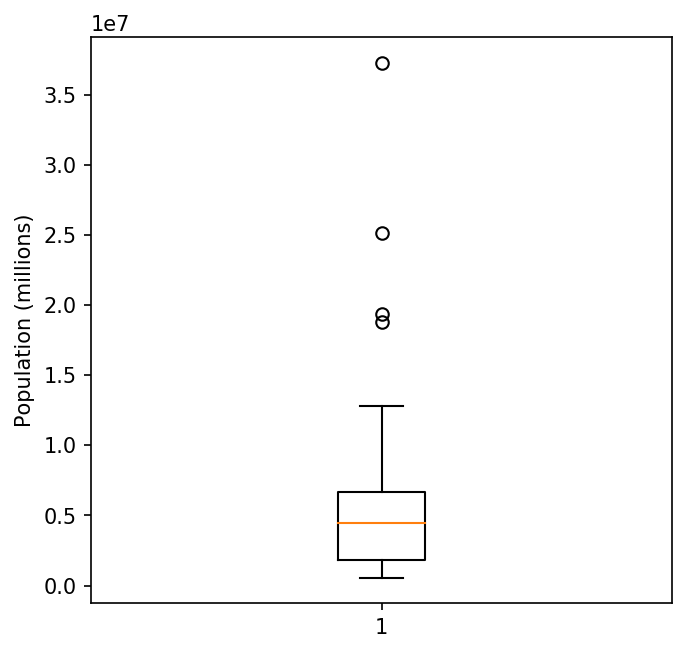

In [21]:
plt.figure(figsize = (5,5), dpi = 150)
plt.boxplot(df["Population"])
plt.ylabel("Population (millions)")

## Frequency tables and hisograms

### Frequency Table

In [22]:
intervals = pd.cut(df["Population"], 10)
df["Interval"] = intervals
df.head(3)

,State,Population,Murder.Rate,Abbreviation,Interval
0,Alabama,4779736,5.7,AL,"(4232659.0, 7901692.0]"
1,Alaska,710231,5.6,AK,"(526935.67, 4232659.0]"
2,Arizona,6392017,4.7,AZ,"(4232659.0, 7901692.0]"


In [23]:
n_of_states_in_interv = df["Interval"].value_counts()

ranges = np.array(n_of_states_in_interv.index.values)
count = np.array(n_of_states_in_interv.values)

states_in_interv = {}
for i in ranges:
    states_in_interv[i] = []
for i in range(50):
    states_in_interv[df.iloc[i, 4]].append(df.iloc[i, 3])
    
states_in_interv = list(states_in_interv.values())
states_in_interv = [",".join(l) for l in states_in_interv]

In [24]:
pop_freq = pd.DataFrame({"Range": ranges, 
                         "Count": count, 
                         "States": states_in_interv}).sort_values("Range").set_index(np.arange(1, 11))
pop_freq

,Range,Count,States
1,"(526935.67, 4232659.0]",24,"AK,AR,CT,DE,HI,ID,IA,KS,ME,MS,MT,NE,NV,NH,NM,N..."
2,"(4232659.0, 7901692.0]",14,"AL,AZ,CO,IN,KY,LA,MD,MA,MN,MO,SC,TN,WA,WI"
3,"(7901692.0, 11570725.0]",6,"GA,MI,NJ,NC,OH,VA"
4,"(11570725.0, 15239758.0]",2,"IL,PA"
5,"(15239758.0, 18908791.0]",1,FL
6,"(18908791.0, 22577824.0]",1,NY
7,"(22577824.0, 26246857.0]",1,TX
8,"(26246857.0, 29915890.0]",0,
9,"(29915890.0, 33584923.0]",0,
10,"(33584923.0, 37253956.0]",1,CA


### Histogram

Text(0, 0.5, 'Frequency')

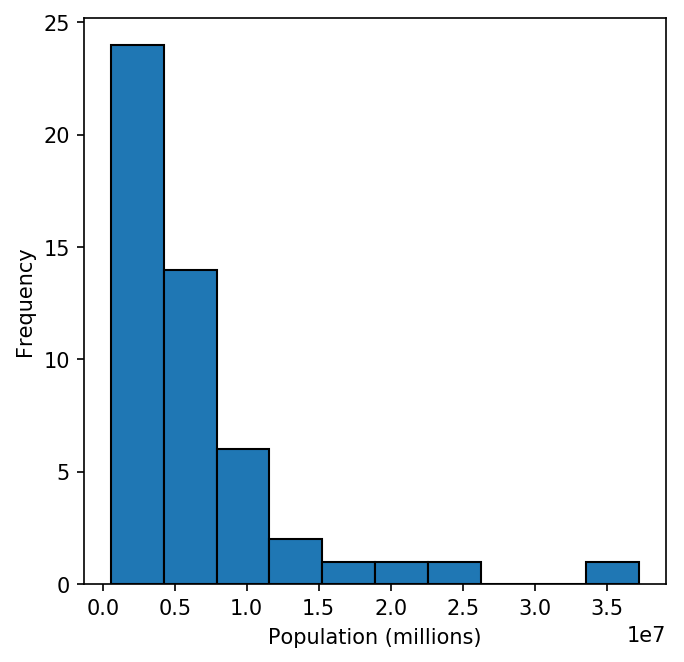

In [25]:
plt.figure(figsize = (5, 5), dpi = 150)
plt.hist(df["Population"], edgecolor = "k")
plt.xlabel("Population (millions)")
plt.ylabel("Frequency")

## Density Estimates

Relared to the histogram is a density plot, which shows the distribution of data vales as a continuous line.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Density')

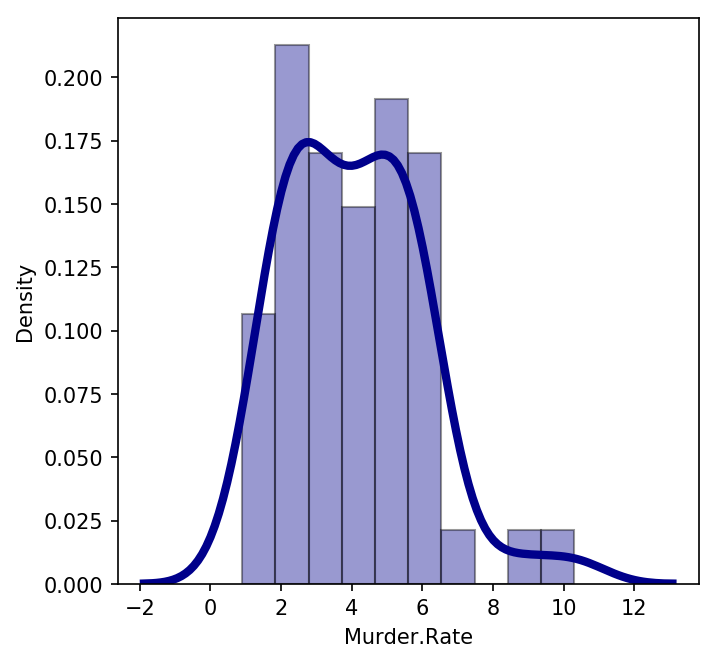

In [26]:
plt.figure(figsize = (5, 5), dpi = 150)
sns.distplot(df["Murder.Rate"], hist=True, kde=True, 
             color = 'darkblue', bins = 10,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.ylabel("Density")

# Exploring Categorical Data

## Mode

In [27]:
dfw = pd.read_csv("../input/percentage-of-delays-by-cause-at-dfw/dfw_airline.csv")
dfw

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


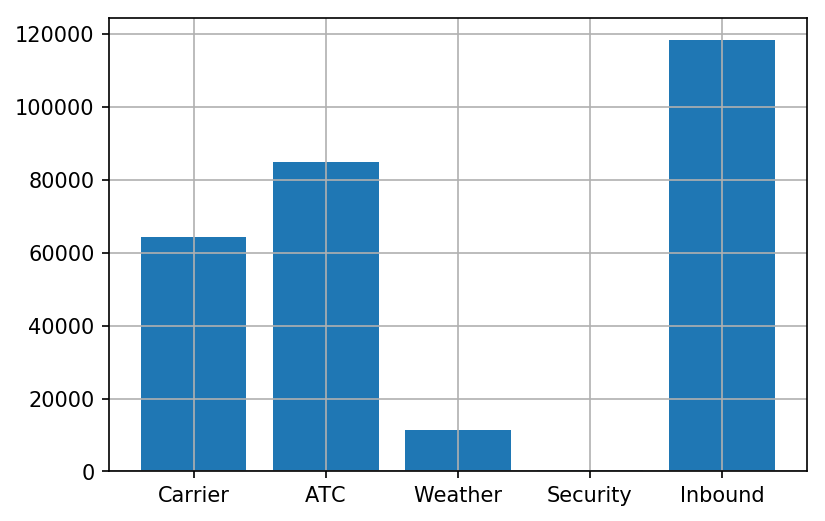

In [28]:
plt.figure(dpi = 150)
plt.bar(dfw.columns, dfw.iloc[0])
plt.grid()

Here the **mode** of the cause of flight delays at Dallas/Fort Worth airport is "Inbound"

Another way of visualizing a **categorical data**.

([<matplotlib.patches.Wedge at 0x7f526fffa3c8>,
 [Text(0.8395892652821655, 0.7412758363948968, 'Carrier'),
  Text(-0.8345098833527672, 0.7619010792659051, 'ATC'),
  Text(-1.0364501530823163, -0.36847127455969136, 'Weather'),
  Text(-0.9797790589807105, -0.5000329944942369, 'Security'),
  Text(0.2686314184802764, -1.1078976311037383, 'Inbound')],
 [Text(0.46477262899548444, 0.4103491237186036, '23%'),
  Text(-0.46525772257720643, 0.42477670790930994, '30%'),
  Text(-0.5653364471358088, -0.20098433157801346, '4%'),
  Text(-0.5344249412622056, -0.27274526972412916, '0%'),
  Text(0.15081062090120775, -0.6219776174617477, '42%')])

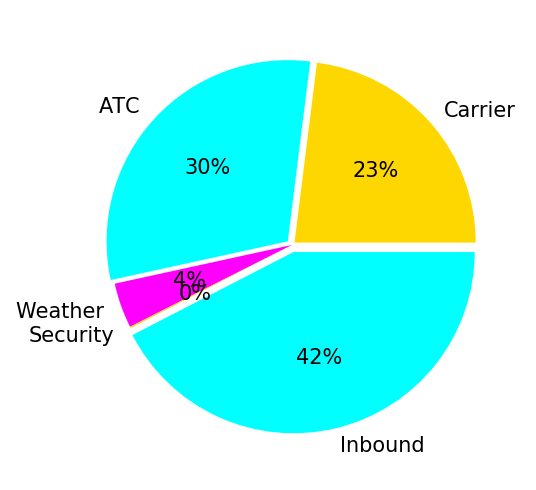

In [29]:
plt.figure(dpi = 150)
plt.pie(dfw.iloc[0], labels = dfw.columns, autopct='%1.0f%%', explode=[0.02,0.03,0,0,0.04], colors = ["gold", "cyan", "magenta"])

# Correlation

## Correlation Matrix


Getting the data.

In [30]:
spdata = pd.read_csv("../input/stock-price/sp500_data.csv")
spdata.head(3)

,Unnamed: 0,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,ADI,AVGO,BRCM,FSLR,INTC,LLTC,MCHP,MU,NVDA,QRVO,QCOM,SWKS,TXN,XLNX,AAPL,HPQ,EA,SNDK,STX,WDC,TEL,HRS,MSI,ACN,AMAT,KLAC,LRCX,ADBE,ADSK,...,ENDP,LLY,MNK,MRK,MYL,PRGO,PFE,ZTS,ABT,A,BCR,BAX,BDX,BSX,EW,HSP,ISRG,JNJ,MDT,PKI,STJ,SYK,TMO,VAR,ZBH,BMY,CAH,CERN,ESRX,MCK,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
0,1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,-0.015785,0.0,0.0,0.0,-0.050488,-0.089870,0.0,0.037021,0.0,0.0,-0.044718,-0.041262,0.060179,0.033152,-0.024235,0.045586,0.12500,0.0,0.0,0.118103,0.0,0.016412,-1.842719,0.0,-0.012867,0.079940,0.246706,-0.044884,0.057267,...,0.0,-0.077535,0.0,-0.028797,0.166355,-0.577943,0.066591,0.0,0.045961,0.0,-0.326659,0.000000,-0.033363,0.06250,0.0,0.0,0.0,0.018827,0.006047,0.000000,0.187132,0.276317,-0.124187,0.037430,0.0,0.038546,0.060142,0.03126,0.00195,0.0,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.125,0.0
1,1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,-0.015793,0.0,0.0,0.0,0.095367,0.044935,0.0,0.037020,0.0,0.0,0.006387,-0.041252,0.102317,0.099446,0.064618,0.072942,0.09375,0.0,0.0,0.000000,0.0,-0.032829,0.594428,0.0,0.016077,0.019985,0.411170,0.134672,0.057267,...,0.0,-0.031014,0.0,-0.172781,-0.066536,0.346766,-0.027745,0.0,-0.045960,0.0,-0.093331,0.018157,0.100076,0.03125,0.0,0.0,0.0,-0.056481,-0.048392,0.041782,-0.074851,-0.027632,0.000000,-0.074859,0.0,-0.038546,0.060142,0.10156,0.01953,0.0,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.125,0.0
2,1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,0.047363,0.0,0.0,0.0,0.000000,0.067402,0.0,0.123402,0.0,0.0,0.035141,0.041252,-0.024066,0.016572,-0.016148,-0.045586,-0.06250,0.0,0.0,0.118103,0.0,-0.032829,0.237767,0.0,0.051450,0.000000,0.054828,0.082299,-0.042955,...,0.0,-0.062028,0.0,-0.143984,-0.066536,0.693532,-0.133183,0.0,-0.153198,0.0,-0.093331,-0.072626,0.000000,0.03125,0.0,0.0,0.0,-0.018827,0.000000,0.208912,0.018711,-0.027632,0.000000,0.044923,0.0,-0.115639,-0.030071,-0.01562,0.00000,0.0,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.000,0.0


Getting information about companies.

In [31]:
spsec = pd.read_csv("../input/stock-price/sp500_sectors.csv")
spsec.head(3)

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT


Getting companies from telecommunication service industry.

In [32]:
telecom = list(spsec[spsec["sector"] == "telecommunications_services"]["symbol"].values)
telecom

['T', 'CTL', 'FTR', 'VZ', 'LVLT']

Filtering data (getting values newer than 2012-07-01)

In [33]:
latest_spdata = spdata[spdata["Unnamed: 0"]>"2012-07-01"]
telecom = latest_spdata[['T', 'CTL', 'FTR', 'VZ', 'LVLT']]
telecom.head(5)

,T,CTL,FTR,VZ,LVLT
4893,0.422496,0.140847,0.070879,0.554180,-0.519998
4894,-0.177448,0.066280,0.070879,-0.025976,-0.049999
4895,-0.160548,-0.132563,0.055128,-0.051956,-0.180000
4896,0.342205,0.132563,0.007875,0.140106,-0.359999
4897,0.136883,0.124279,-0.023626,0.253943,0.180000


And finally, the **correlation matrix**.


(Correltion between telecommunication stock returns)

In [34]:
telecom.corr()

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474683,0.327767,0.677612,0.278626
CTL,0.474683,1.000000,0.419757,0.416604,0.286665
FTR,0.327767,0.419757,1.000000,0.287386,0.260068
VZ,0.677612,0.416604,0.287386,1.000000,0.242199
LVLT,0.278626,0.286665,0.260068,0.242199,1.000000


Plotting of the same matrix.

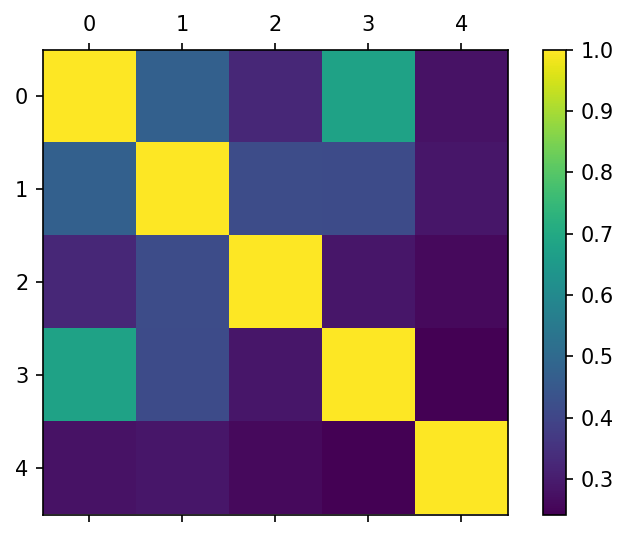

In [35]:
plt.figure(dpi=150)
plt.matshow(telecom.corr(), fignum=1)
plt.colorbar()

## Scatterplot

Scatter plot between stock returns for *ATT* and *Verizon*

The returns have a strong positive relationship: on most days, both stocks go up or go down in tandem. There are few days where one stock goes downs significantly while the other stock goes up (and vice versa).

Text(0, 0.5, 'Verizon stock')

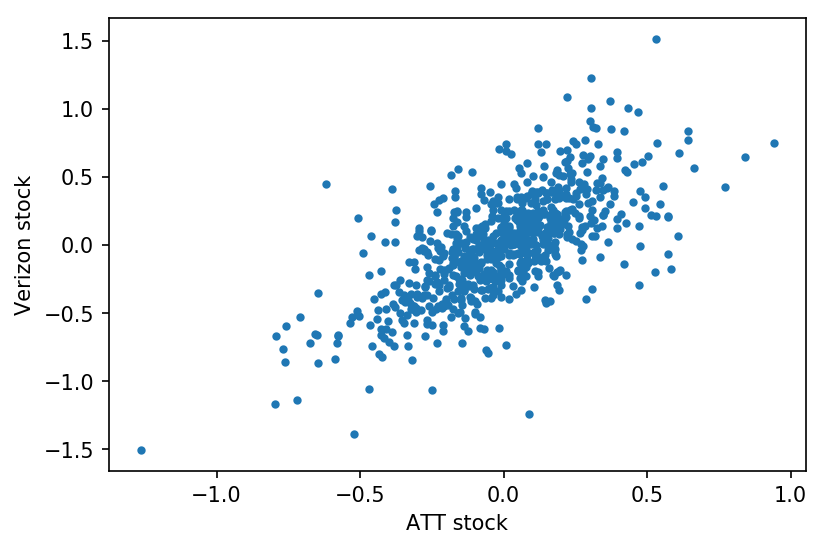

In [36]:
plt.figure(dpi = 150)
plt.scatter(telecom["T"], telecom["VZ"], marker = ".")
plt.xlabel("ATT stock")
plt.ylabel("Verizon stock")

# Exploring Two or More Variables

## Contingency Table

In [37]:
lcl = pd.read_csv("../input/letterofcredit-loans/lc_loans.csv")
lcl.head(5)

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B


A useful way to summarize two categorical variables is a contingency table-table of counts by category.

Contingency table of loan grade and status.

In [38]:
pd.crosstab(lcl["grade"], lcl["status"], margins = True)

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


## Hexagonal Binning

We are not using scatter plot here, because there are a lot of "dots"(data points) to display. It will not be understandable. Instead we can use alternatives, such as: hexagonal binning, contour plots, etc. You'll see them here.

In [39]:
tax = pd.read_csv("../input/houses-tax-data/kc_tax.csv")
tax.describe()

,TaxAssessedValue,SqFtTotLiving,ZipCode
count,4.975110e+05,498249.000000,4.679000e+05
mean,4.737959e+05,2057.651714,9.830935e+04
std,5.380832e+05,938.705293,1.440555e+05
min,1.000000e+03,0.000000,0.000000e+00
25%,2.690000e+05,1410.000000,9.803200e+04
50%,3.840000e+05,1900.000000,9.807000e+04
75%,5.490000e+05,2520.000000,9.811800e+04
max,1.235360e+08,48160.000000,9.815706e+07


In [40]:
# def rmv_outliers(lst1, lst2):
#     """This Function is removing outliers and 
#     returning two lists with the same length.
#     """
#     lst1, lst2 = lst1.dropna(), lst2.dropna()
#     d = {key: value for key, value in zip(lst1, lst2)}
    
#     l1_q1, l1_q3 = np.percentile(lst1, [25, 75])
#     l2_q1, l2_q3 = np.percentile(lst2, [25, 75])
    
#     l1_iqr = l1_q3 - l1_q1
#     l2_iqr = l2_q3 - l2_q1
    
#     l1_lower_bound = l1_q1 - (1.5 * l1_iqr)
#     l1_upper_bound = l1_q3 + (1.5 * l1_iqr)
    
#     l2_lower_bound = l2_q1 - (1.5 * l2_iqr)
#     l2_upper_bound = l2_q3 + (1.5 * l2_iqr)
  
#     for key in d.copy().keys():
#         if key < l1_lower_bound or key > l1_upper_bound:
#             del d[key]
#     for key, value in d.copy().items():
#         if value < l2_lower_bound or value > l2_upper_bound:
#             del d[key] 
#     return list(d.keys()), list(d.values())
    
# SqFtTotLiving, TaxAssessedValue = rmv_outliers(tax["SqFtTotLiving"], tax["TaxAssessedValue"])
# SqFtTotLiving, TaxAssessedValue = pd.Series(SqFtTotLiving), pd.Series(TaxAssessedValue)

As we can see the max of SqFtTotLiving and TaxAssessedValue have significant difference from others so we need to remove outliers (by limiting the acceptable values).

Text(0, 0.5, 'Tax-Assessed Value')

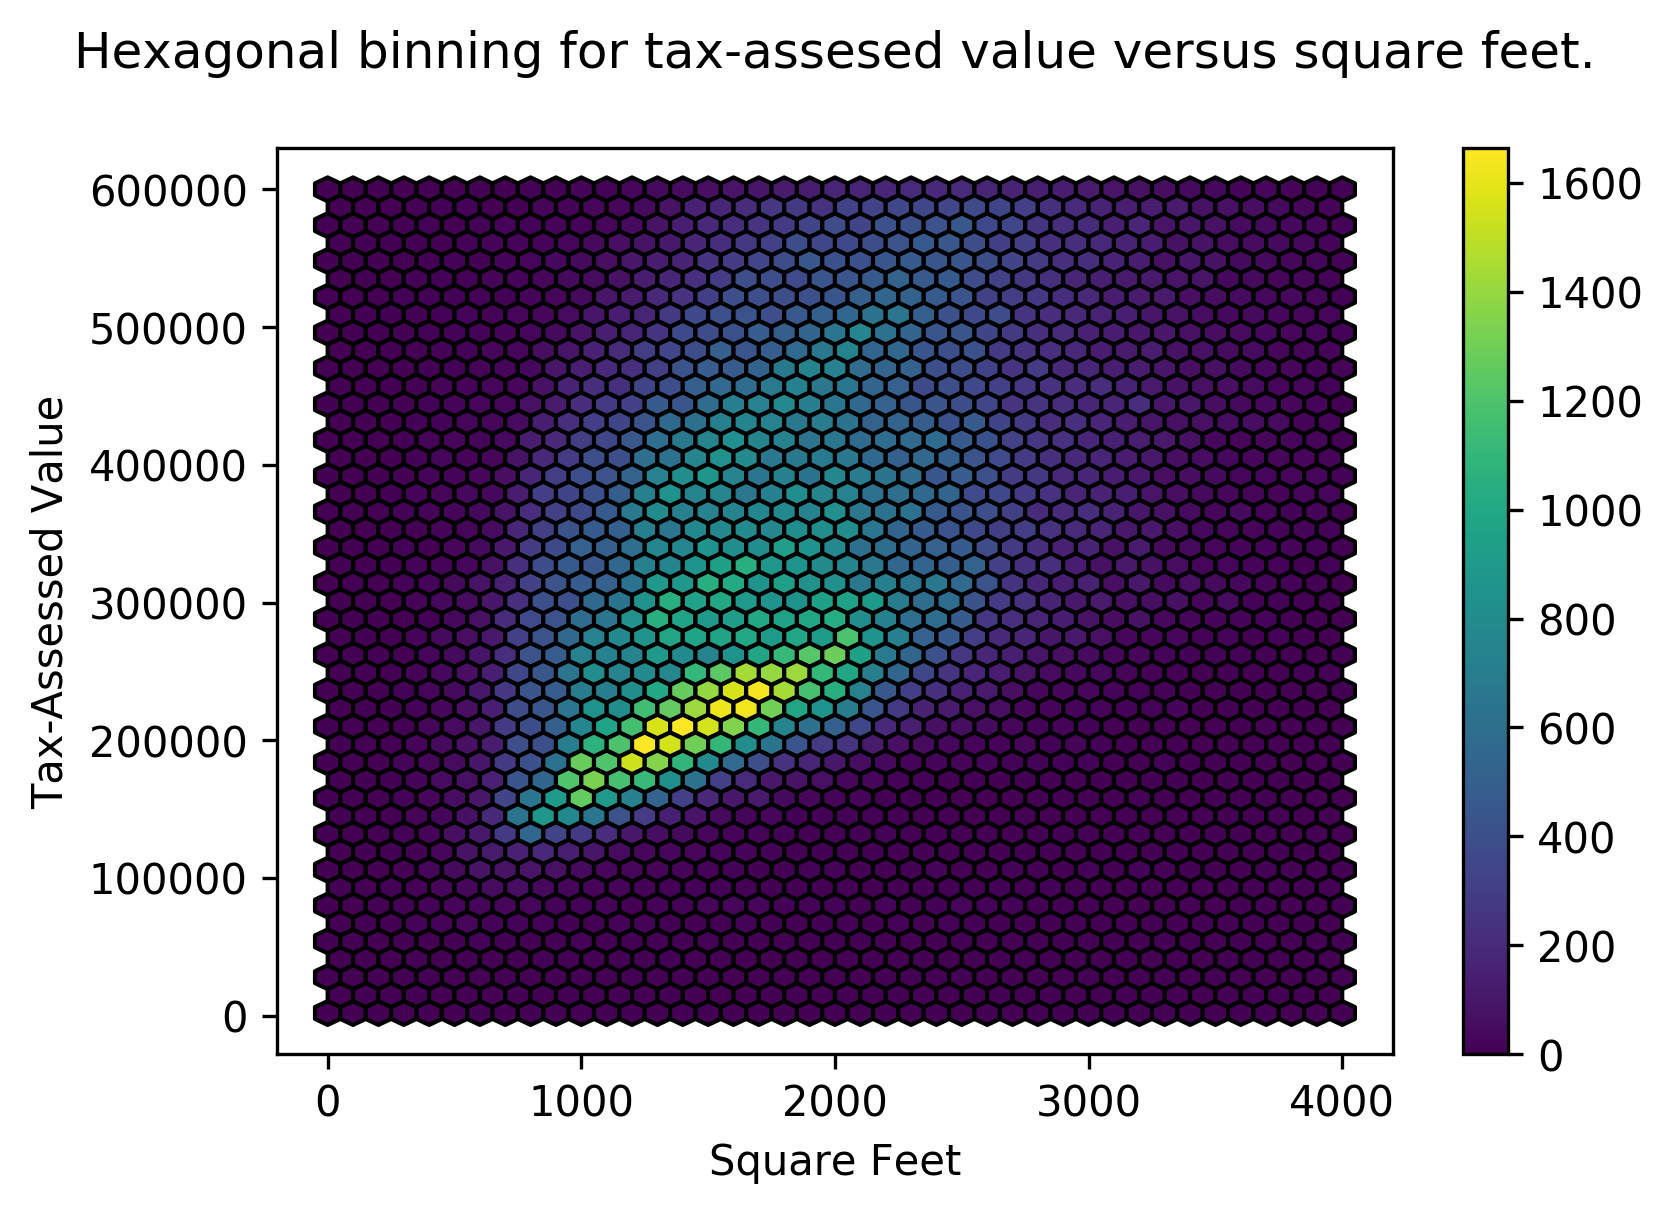

In [41]:
SqFtTotLiving = tax[(tax["TaxAssessedValue"]<=600000) & (tax["SqFtTotLiving"] <= 4000)]["SqFtTotLiving"] 
TaxAssessedValue = tax[(tax["TaxAssessedValue"]<=600000) & (tax["SqFtTotLiving"] <= 4000)]["TaxAssessedValue"]
SqFtTotLiving, TaxAssessedValue = pd.Series(SqFtTotLiving), pd.Series(TaxAssessedValue)

plt.figure(dpi = 300)
plt.hexbin(SqFtTotLiving, TaxAssessedValue, edgecolor = "k", gridsize = 40)
plt.colorbar()

plt.title("Hexagonal binning for tax-assesed value versus square feet.\n")
plt.xlabel("Square Feet")
plt.ylabel("Tax-Assessed Value")

## Contour Plot

Other types of charts are used to show the relationship between two numeric variables, including *heat maps*. Heat maps, hexagonal binning, and contour plots all give a visual representation of a two-dimensional density. In this way, they are natural analogs to histograms and density plots.

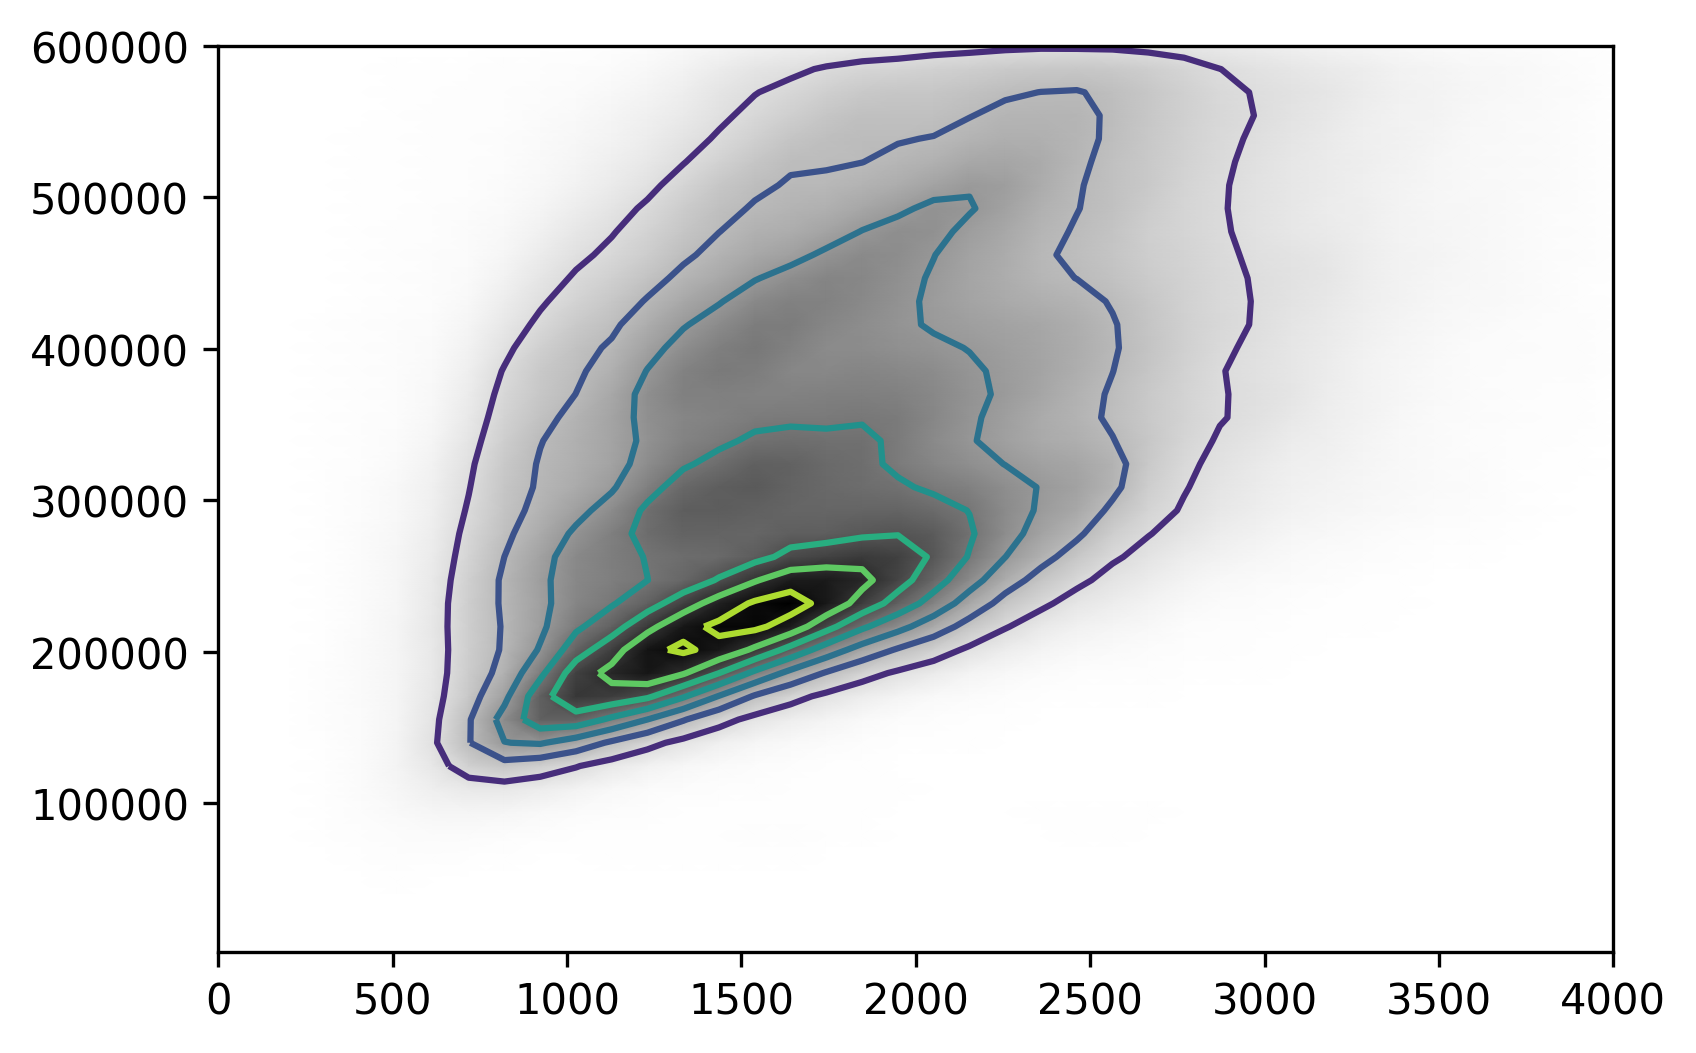

In [42]:
x, y = SqFtTotLiving, TaxAssessedValue
nbins = 40

k = kde.gaussian_kde((SqFtTotLiving, TaxAssessedValue))
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

plt.figure(dpi = 300)
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap="binary")

plt.contour(xi, yi, zi.reshape(xi.shape))

## Categorical and Numeric Data

### Boxplots

Boxplots are a simple way to visually compare the distributions of a numeric variable grouped according to a categorical variable.

In [43]:
airline_stats = pd.read_csv("../input/airline-delays/airline_stats.csv")
airline_stats.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


The percentage of flights in a mont that were **delayed** where the delay was **within the carrier's control**.

Text(0, 0.5, 'Daily % of Delayed Flights')

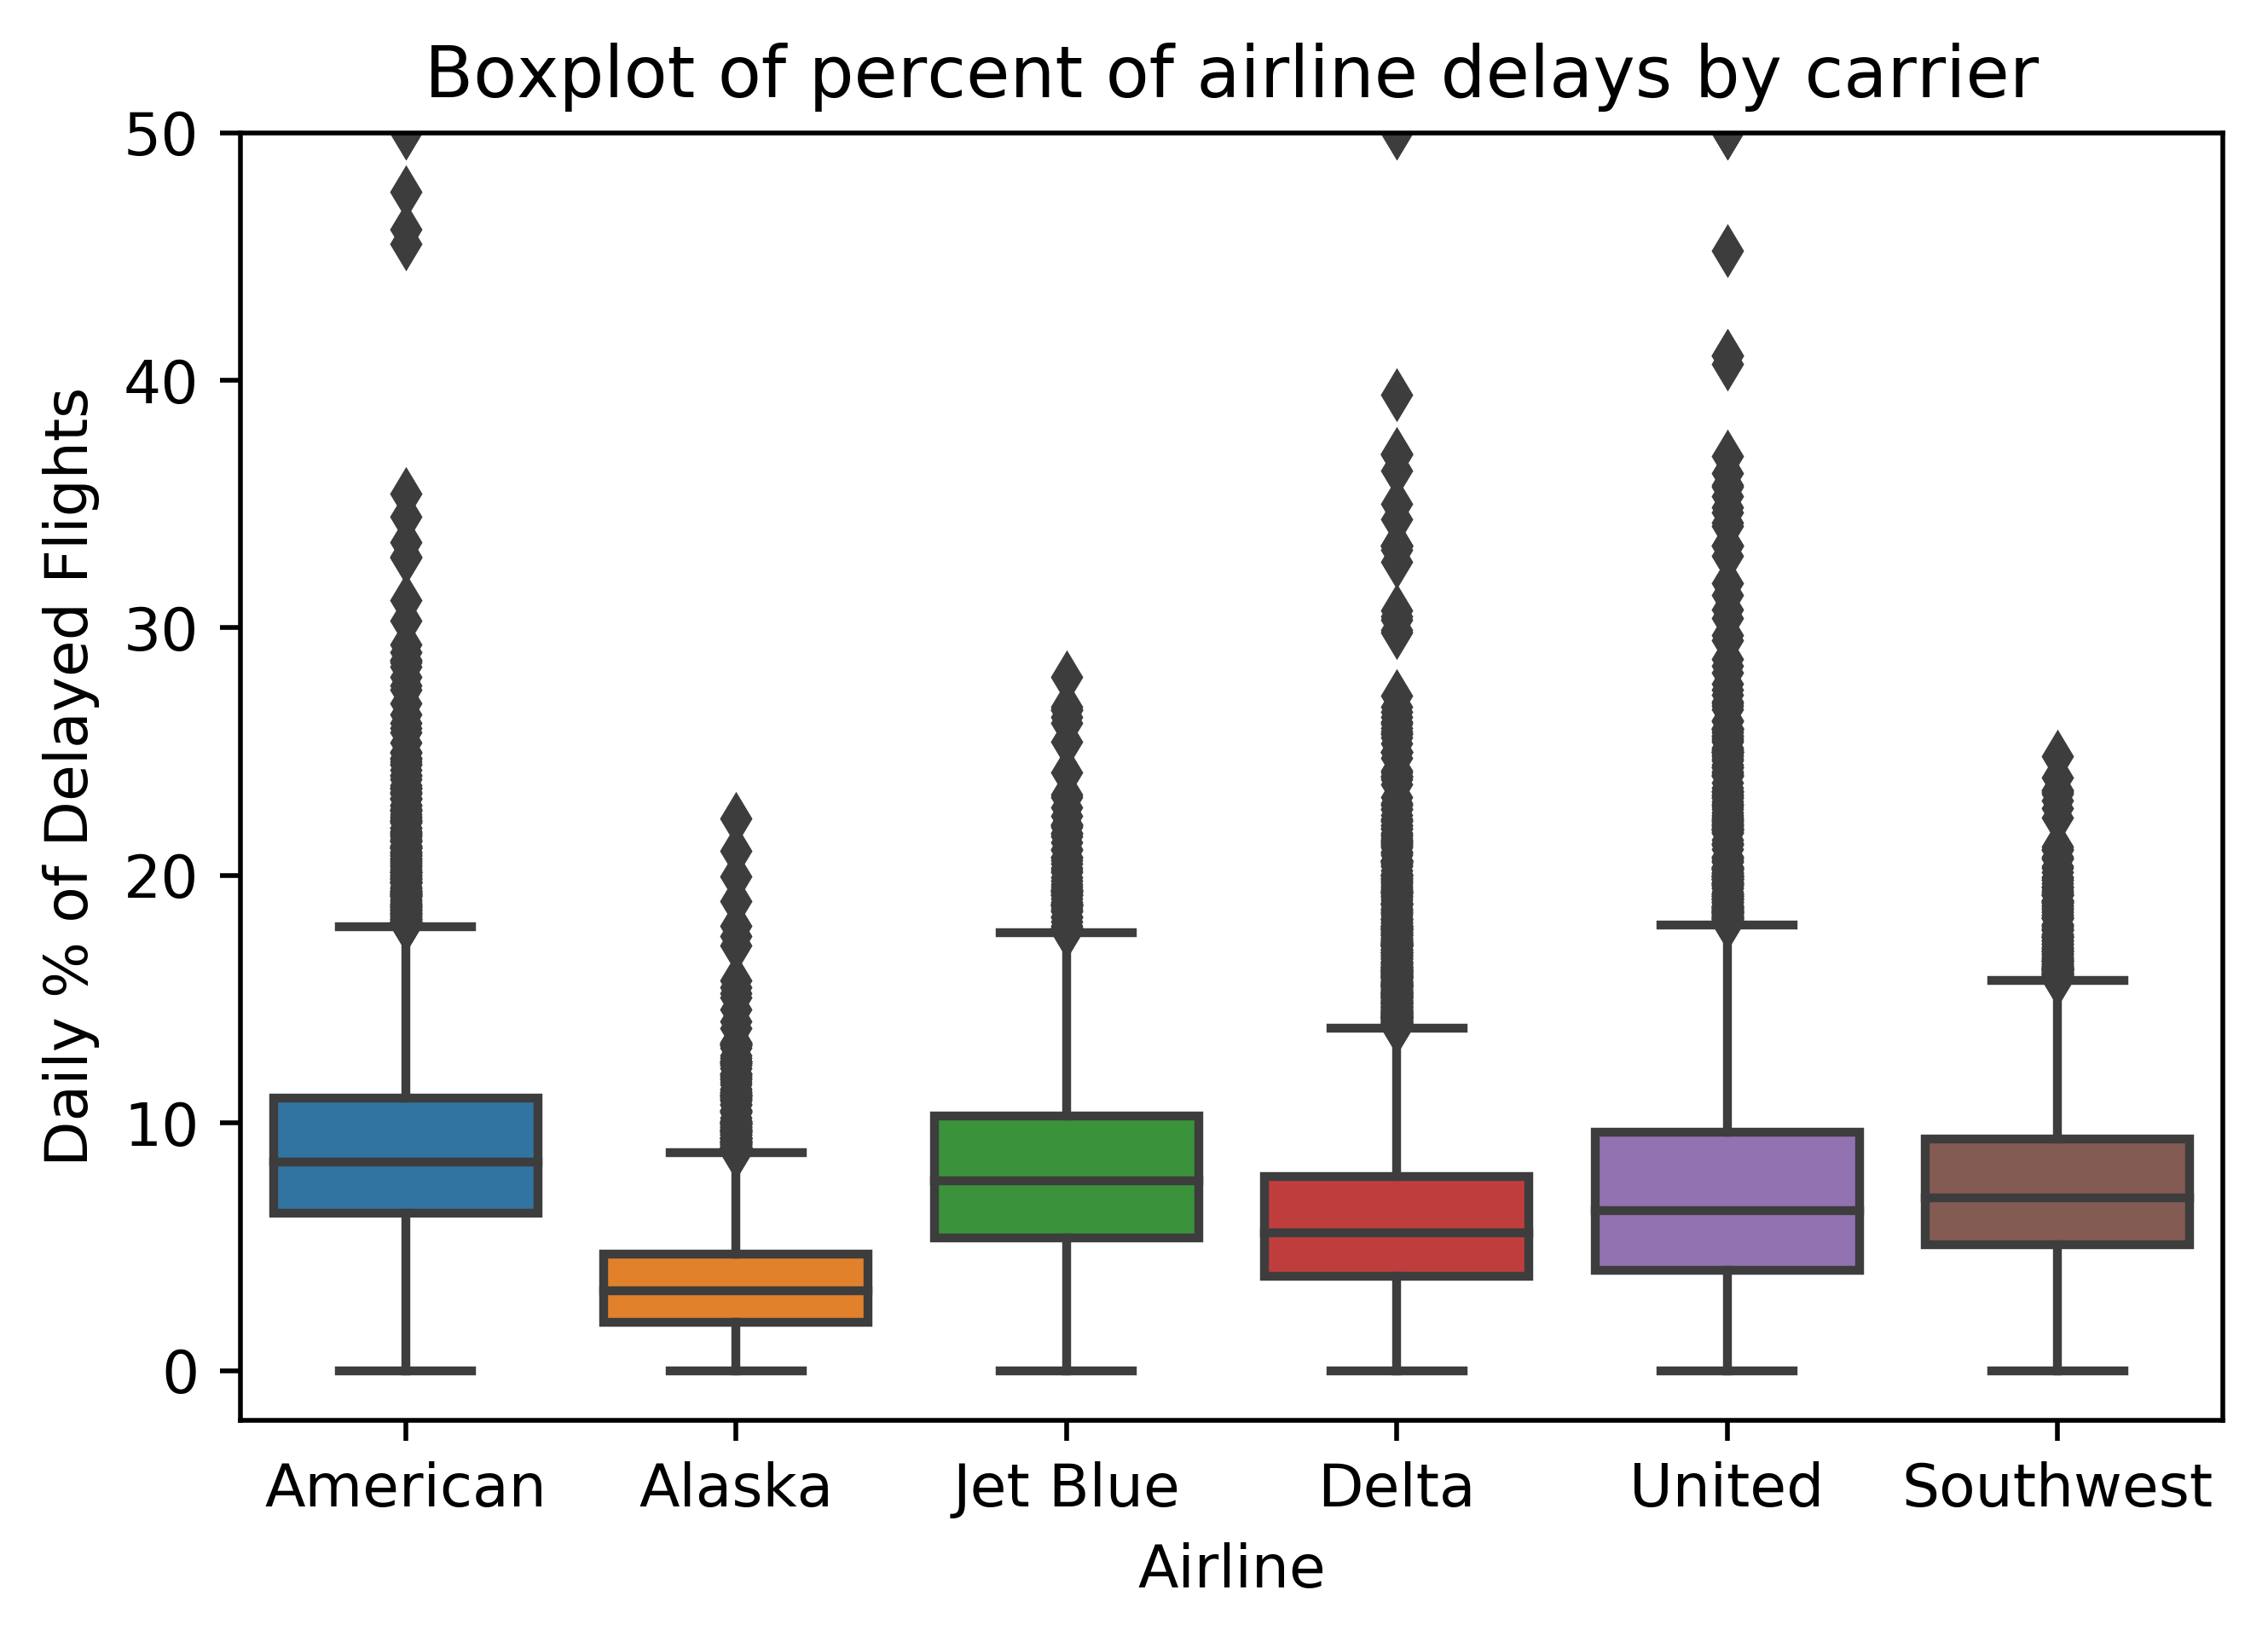

In [44]:
plt.figure(dpi = 500)
plt.ylim(-2, 50)

sns.boxplot(x = "airline", y = "pct_carrier_delay", data = airline_stats)

plt.title("Boxplot of percent of airline delays by carrier")
plt.xlabel("Airline")
plt.ylabel("Daily % of Delayed Flights")

Alaska stands out as having the fewest delays, while American has the most delays: the lower quartile for American is higher than te upper quartile for Alaska. 

### Violin Plots

A *violin plot* is an enhancement to the boxplot and plots density estimate with the density on the y-axis. The density is mirrored and flipped over and the resulting shape is filled in, creating an image resembling a violin. The advantage of a violin plot is that it can show nuances in the distributin that aren't perceptible in a boxplot.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Daily % of Delayed Flights')

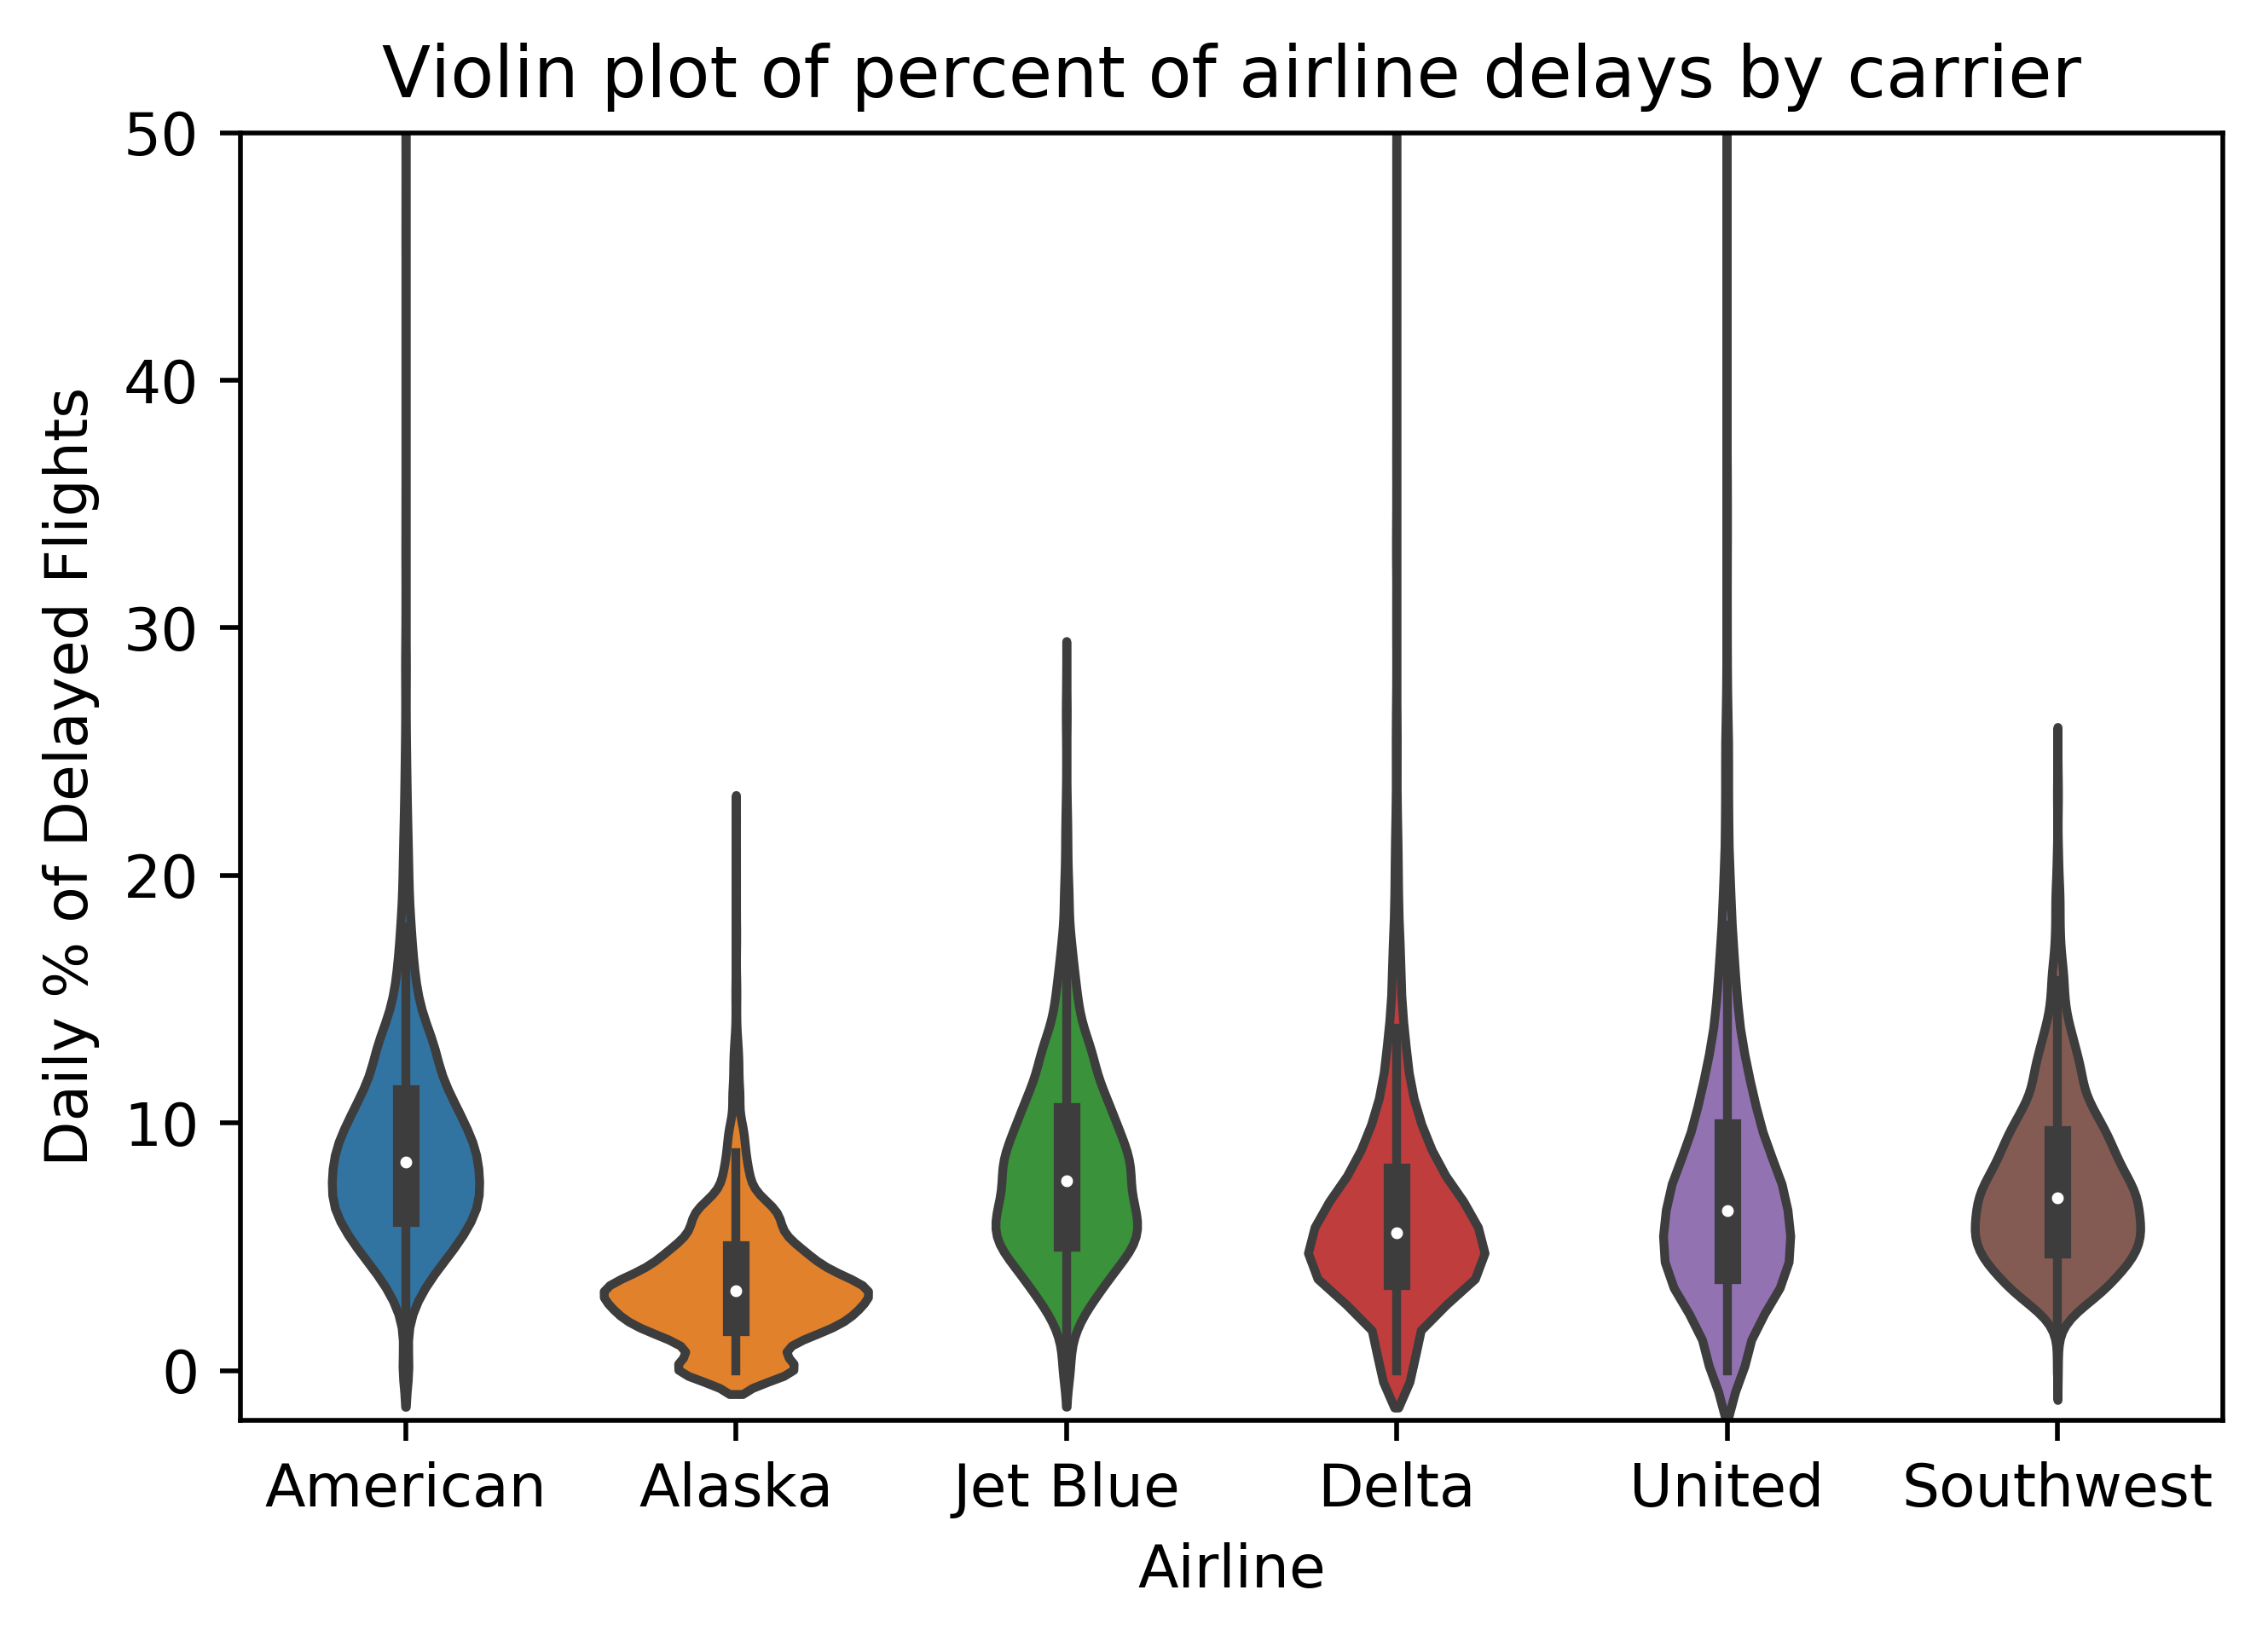

In [45]:
plt.figure(dpi = 500)
plt.ylim(-2, 50)

sns.violinplot(x = "airline", y = "pct_carrier_delay", data = airline_stats)

plt.title("Violin plot of percent of airline delays by carrier")
plt.xlabel("Airline")
plt.ylabel("Daily % of Delayed Flights")

## Visualising Multiple Variables

Removing outliers

In [46]:
tax = tax[(tax["TaxAssessedValue"]<=600000) & (tax["SqFtTotLiving"] <= 4000)]

Plotting

Text(0.04, 0.5, 'Finished Square Feet')

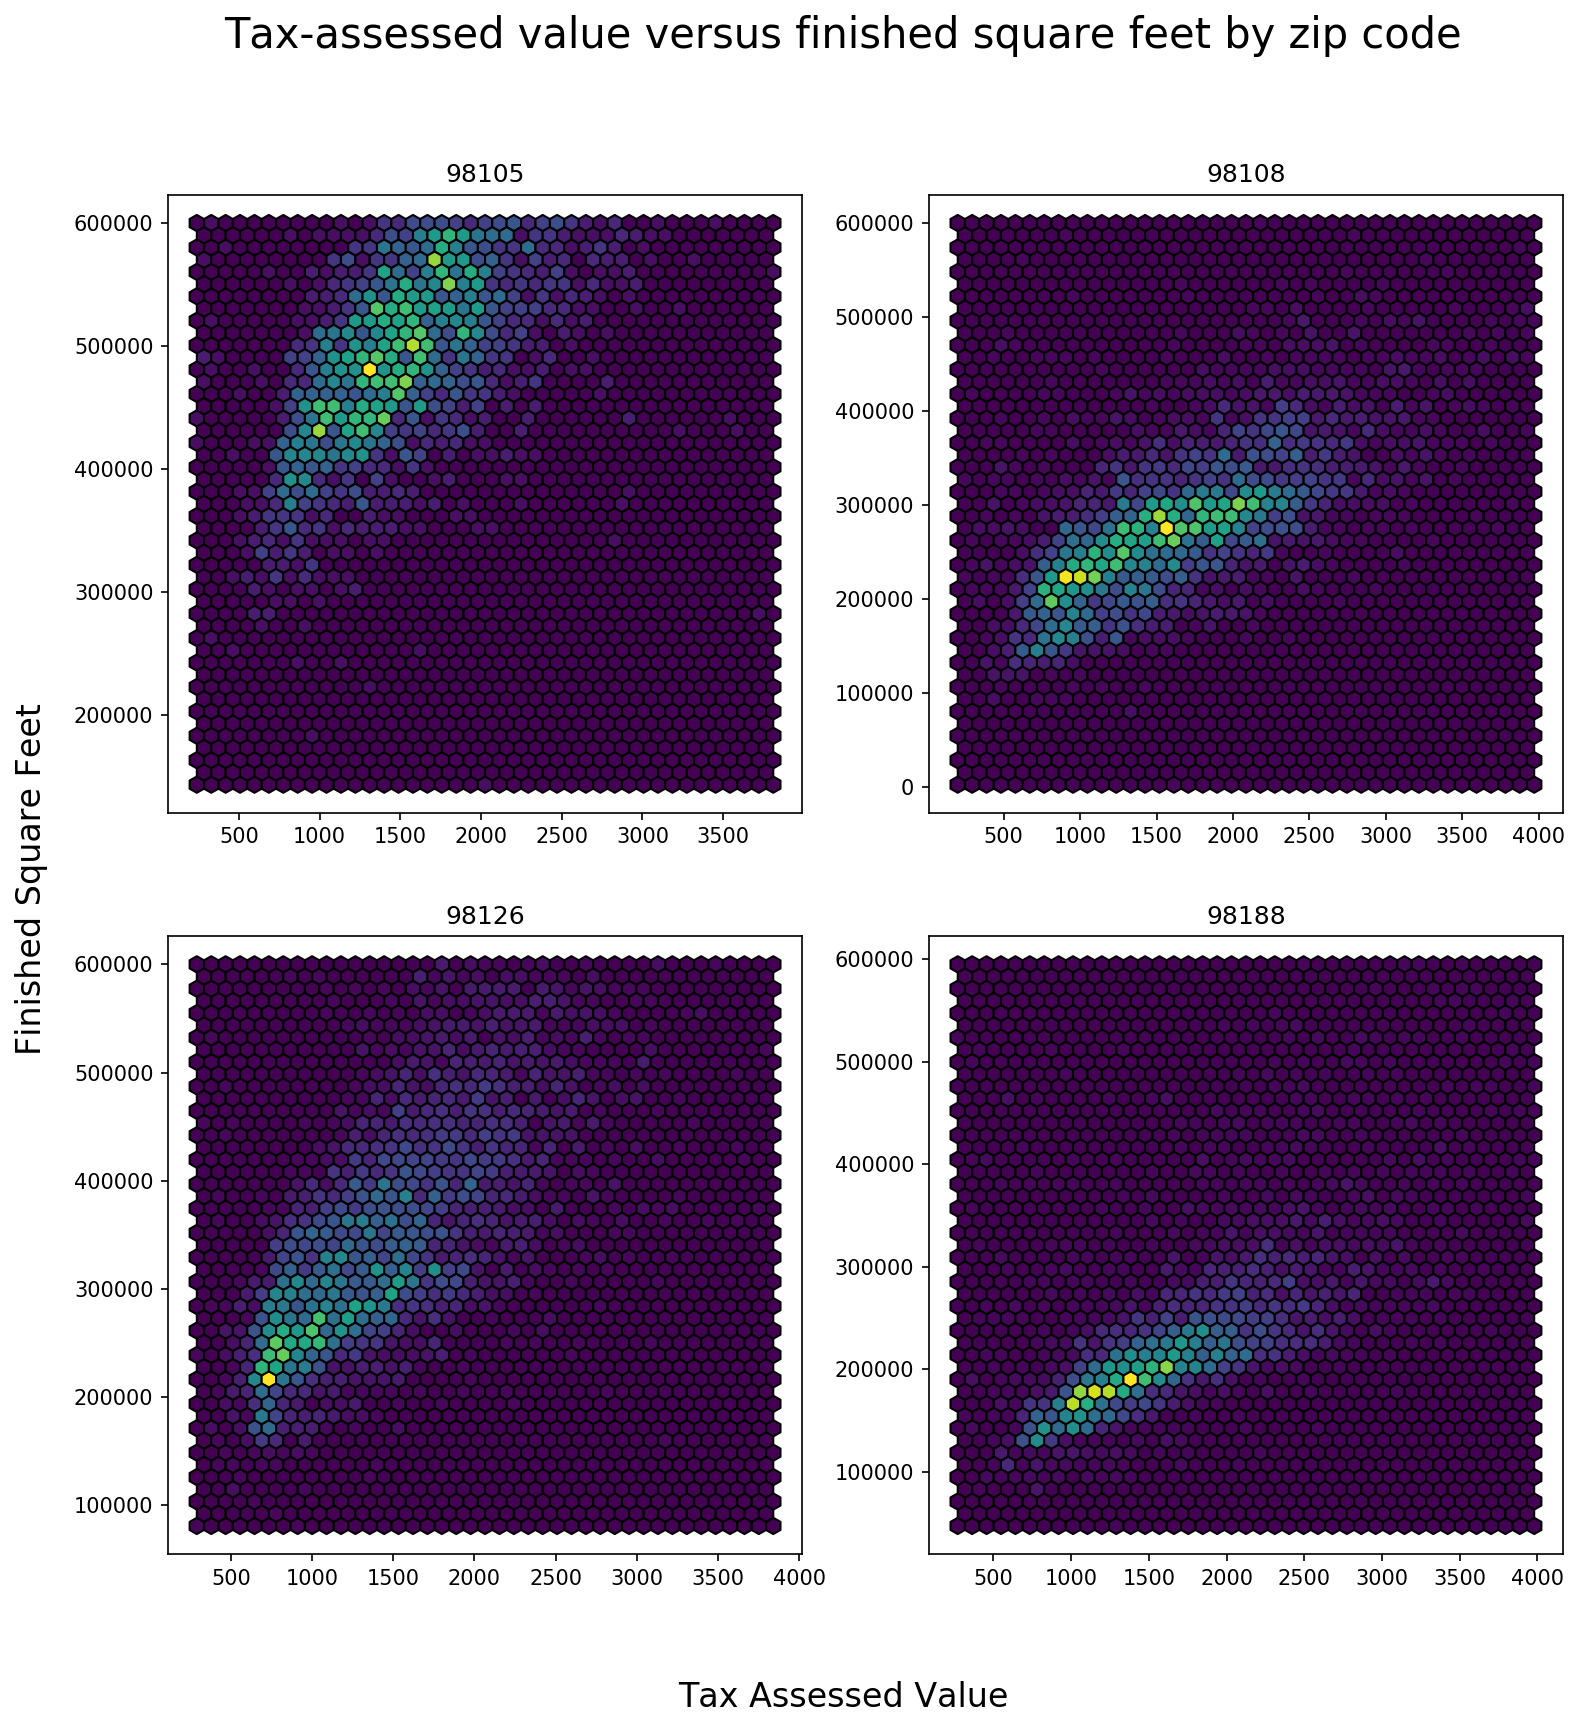

In [47]:
fig, axs = plt.subplots(2,2, dpi = 150, figsize = (12,12))
axs[0][0].hexbin(tax[tax["ZipCode"] == 98105]["SqFtTotLiving"], tax[tax["ZipCode"] == 98105]["TaxAssessedValue"], label = "98105", edgecolor = "k", gridsize = 40)
axs[0][1].hexbin(tax[tax["ZipCode"] == 98108]["SqFtTotLiving"], tax[tax["ZipCode"] == 98108]["TaxAssessedValue"], edgecolor = "k", gridsize = 40)
axs[1][0].hexbin(tax[tax["ZipCode"] == 98126]["SqFtTotLiving"], tax[tax["ZipCode"] == 98126]["TaxAssessedValue"], edgecolor = "k", gridsize = 40)
axs[1][1].hexbin(tax[tax["ZipCode"] == 98188]["SqFtTotLiving"], tax[tax["ZipCode"] == 98188]["TaxAssessedValue"], edgecolor = "k", gridsize = 40)

fig.suptitle("Tax-assessed value versus finished square feet by zip code", fontsize = 20)

axs[0][0].set_title("98105")
axs[0][1].set_title("98108")
axs[1][0].set_title("98126")
axs[1][1].set_title("98188")

fig.text(0.5, 0.04, "Tax Assessed Value", ha='center', fontsize = 16)
fig.text(0.04, 0.5, "Finished Square Feet", va='center', rotation='vertical', fontsize = 16)


# Summary

With the development of exploratory data analysis (EDA), pioneered by John Tukey, statistics set a
foundation that was a precursor to the field of data science. The key idea of EDA is that the first and most
important step in any project based on data is to look at the data. By summarizing and visualizing the
data, you can gain valuable intuition and understanding of the project.
.

This kernel has reviewed concepts ranging from simple metrics, such as estimates of location and
variability, to rich visual displays to explore the relationships between multiple variables. The diverse set of tools and techniques being developed by the open source community, combined
with the expressiveness of the R and Python languages, has created a plethora of ways to explore and
analyze data. Exploratory analysis should be a cornerstone of any data science project.

*Source*: Book - Practical Statistics for Data Scientists. Code samples were translated from R to Python by me.